<a href="https://colab.research.google.com/github/josejad42/quantum_algorithms/blob/main/Quantum_Key_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Um protocolo quântico de distribuição de chaves

## 0. Instalando bibliotecas e importando definições

In [ ]:
pip install qiskit pylatexenc qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.0 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
from qiskit.visualization import visualize_transition
import numpy as np
import matplotlib.pyplot as plt

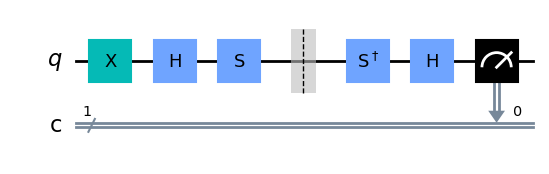

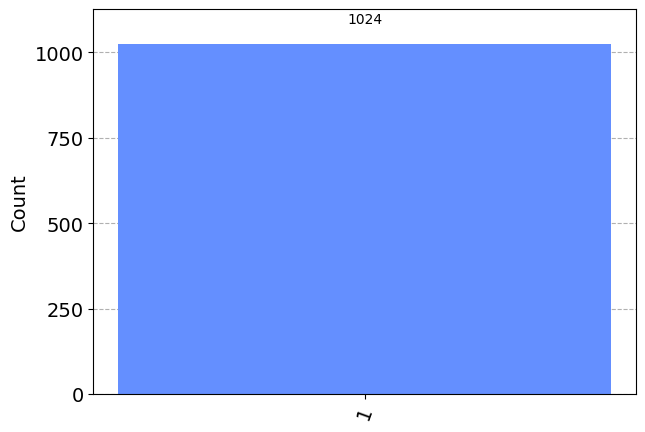

In [ ]:
qc = QuantumCircuit(1, 1)

# Alice prepara o qubit no estado |-> (1 na base de Hadamard)
qc.x(0)
qc.h(0)
qc.s(0)
qc.barrier()

# Alice envia o qubit para Bob
# Bob mede o qubit na base X
qc.sdg(0)
qc.h(0)
qc.measure(0, 0)

# Backend
display(qc.draw('mpl'))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_h1 = plot_histogram(job.result().get_counts())
plot_h1

## 1. Uma Visão geral do protocolo

Se Alice preparar um qubit no estado |-> e mandar para Bob, Bob com certeza irá obter 1.

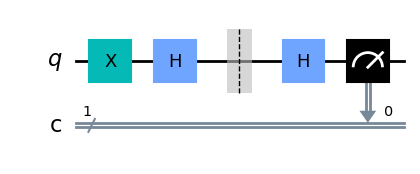

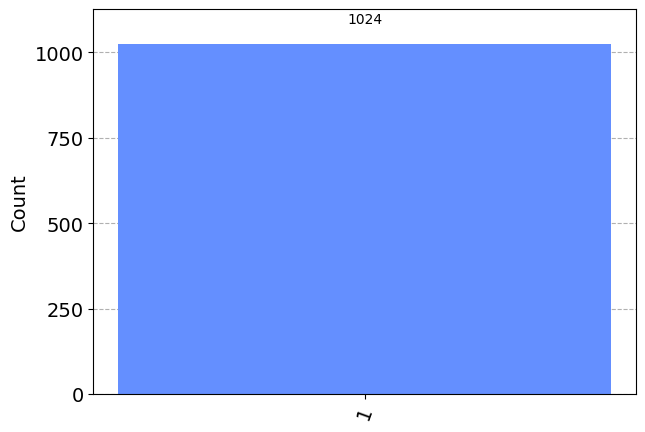

In [ ]:
qc = QuantumCircuit(1, 1)

# Alice prepara o qubit no estado |-> (1 na base de Hadamard)
qc.x(0)
qc.h(0)
qc.barrier()

# Alice envia o qubit para Bob
# Bob mede o qubit na base X
qc.h(0)
qc.measure(0, 0)

# Backend
display(qc.draw('mpl'))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_h1 = plot_histogram(job.result().get_counts())
plot_h1

Por outro lado, se Alice preparar o qubit no estado |->, mandar para Bob e no meio do caminho houver uma interceptação da mensagem por Eve, que mede o qubit na base Z, então Bob pode não obter 1.

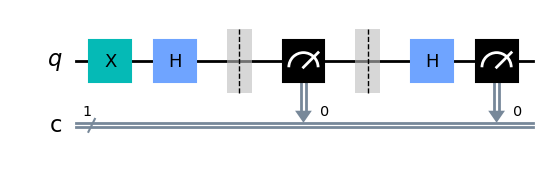

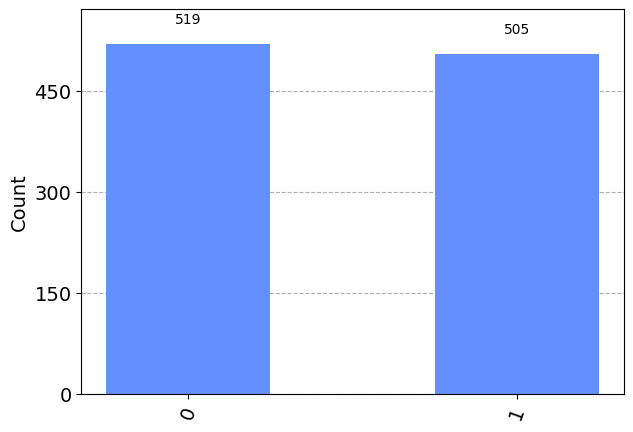

In [ ]:
qc = QuantumCircuit(1,1)

# Alice prepara o qubit no estado |-> e envia para Bob
qc.x(0)
qc.h(0)

# Eve intersepta e tenta ler o qubit
qc.barrier()
qc.measure(0, 0)
qc.barrier()

# Eve manda a mensagem para Bob

# Bob mede o qubit na base X
qc.h(0)
qc.measure(0,0)

# Backend
display(qc.draw('mpl'))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_h2 = plot_histogram(job.result().get_counts())
plot_h2

## 2. Exemplo sem interceptação


### PASSO 1:
#### Alice gera um conjunto aleatório de bits#

In [ ]:
n = 100
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0
 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1]


### PASSO 2:
#### Alice prepara os qubits nas bases X ou Z de modo arbitrário

In [ ]:
#Lista representando a base escolhida para encodar cada bit de alice_bits.
#0 significa preparar na base Z e 1 significa preparar na base X

alice_bases = randint(2, size=n)
print(alice_bases)

[0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1]


In [ ]:
#Função que cria uma lista de QuantumCircuits
#Cada um representa um bit da mensagem de Alice

def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepara qubit na base Z
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: # Prepara qubit na base X
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [ ]:
#Estamos agora codificando a mensagem de Alice
message = encode_message(alice_bits, alice_bases)

bit = 0
basis = 0


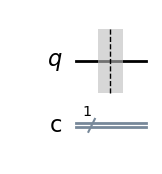

In [ ]:
#Exemplo para o primeiro bit
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
message[0].draw('mpl')

###PASSO 3:
####Bob mede os qubits escolhendo arbitrariamente a base X ou a base Z

In [ ]:
#Array representando a base escolhida para medir cada bit de alice_bits.
bob_bases = randint(2, size=n)
print(bob_bases)

[1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0]


In [ ]:
#Função que mede cada qubit da mensagem
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # mede na base Z
            message[q].measure(0,0)
        if bases[q] == 1: # mede na base X
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [ ]:
#Estamos agora medindo cada qubit da mensagem de Alice
bob_results = measure_message(message, bob_bases)
print(bob_results)

[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0]


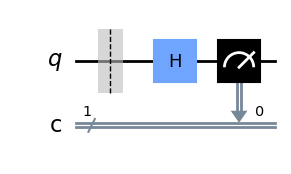

In [ ]:
#primeiro bit
message[0].draw('mpl')

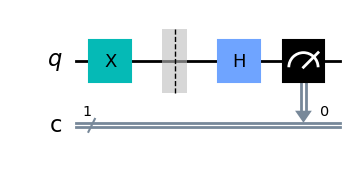

In [ ]:
#segundo bit
message[1].draw('mpl')

###PASSO 4:
####Alice revela quais bases usou para encriptar cada qubit
####Bob revela quais bases usou para medir cada qubit

In [ ]:
#Função que retorna apenas os qubits em que as bases foram iguais
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

In [ ]:
#Chave da Alice
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [ ]:
#Chave do Bob
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]


###PASSO 5:
####Alice e Bob comparam qubits arbitrários para garantir que o protocolo funcionou corretamente

In [ ]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        #usamos o np.mod para garantir que o bit
        i = np.mod(i, len(bits))
        # pop(i) remove o elemento da lista
        sample.append(bits.pop(i))
    return sample

In [ ]:
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
alice_sample = [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]


In [ ]:
#Verificamos se o protocolo funcionou corretamente sem interferências
bob_sample == alice_sample

True

###VISÃO GERAL DA IMPLEMENTAÇÃO:

In [ ]:
np.random.seed()
n = 100

# PASSO 1
alice_bits = randint(2, size=n)

# PASSO 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

# PASSO 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

# PASSO 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

# PASSO 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
alice_sample = [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]


## 3.Exemplo com interceptação

###PASSO 1:
####Alice gera um conjunto aleatório de bits

In [ ]:
# PASSO 1
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
print(alice_bits)

[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1]


###PASSO 2:
#### Alice prepara os qubits nas bases X ou Z de modo arbitrário

In [ ]:
# PASSO 1
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
# PASSO 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


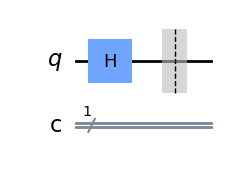

In [ ]:
message[0].draw('mpl')

###INTERCEPTAÇÃO
####Eve intersepta a mensagem e tenta medir os qubits em uma sequência arbitrária de bases

In [ ]:
# PASSO 1
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
# PASSO 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
# Interceptação
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


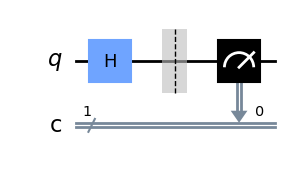

In [ ]:
message[0].draw('mpl')

###PASSO 3:
####Eve passa a mensagem para Bob que mede os qubits escolhendo arbitrariamente a base X ou a base Z

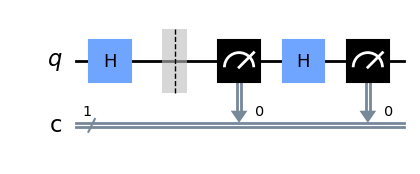

In [ ]:
# PASSO 1
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
# PASSO 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interceptação
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
# PASSO 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
message[0].draw('mpl')

###PASSO 4:
####Alice revela quais bases usou para encriptar cada qubit
####Bob revela quais bases usou para medir cada qubit
####Bits com escolha diferente de base são descartados

In [ ]:
# PASSO 1
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
# PASSO 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interceptação
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
# PASSO 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
# PASSO 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

###PASSO 5:
####Alice e Bob comparam qubits arbitrários para garantir que o protocolo funcionou corretamente

In [ ]:
# PASSO 1
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
# PASSO 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
# Interceptação!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
# PASSO 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
# PASSO 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
# PASSO 5
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
alice_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
#Ao comparar as seleções arbitrárias de qubits de Alice e Bob
#Percebemos que elas não são iguais
bob_sample == alice_sample

False

##Referências:
[Página do qiskit sobre o assunto](https://learn.qiskit.org/course/ch-algorithms/quantum-key-distribution)
